# KMeans

In [9]:
import random
import numpy as np
from scipy.spatial.distance import euclidean
from collections import defaultdict
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from itertools import combinations, izip
% matplotlib inline

def k_means(X, k=5, max_iter=1000):
    """Performs k means

    Args:
    - X - feature matrix
    - k - number of clusters
    - max_iter - maximum iteratations

    Returns:
    - clusters - dict mapping cluster centers to observations
    """
    # initialize central points
    centers = [tuple(pt) for pt in random.sample(X, k)]
    for i in xrange(max_iter):
        clusters = defaultdict(list)

        # assign all data points into their nearest center
        for datapoint in X:
            distances = [euclidean(datapoint, center) for center in centers]
            center = centers[np.argmin(distances)]
            clusters[center].append(datapoint)
        # update new central points
        new_centers = []
        for center, pts in clusters.iteritems():
            new_center = np.mean(pts, axis=0)
            new_centers.append(tuple(new_center))
        # if there is no change between last central set and updated central set
        # stop interation
        if set(new_centers) == set(centers):
            break

        centers = new_centers

    return clusters


def sse(clusters):
    """Sum squared euclidean distance of all points to their cluster center"""
    sum_squared_residuals = 0
    for center, pts in clusters.iteritems():
        for pt in pts:
            sum_squared_residuals += euclidean(pt, center)**2
    return sum_squared_residuals


def plot_k_sse(X, min_k, max_k):
    """Plots sse for values of k between min_k and max_k

    Args:
    - X - feature matrix
    - min_k, max_k - smallest and largest k to plot sse for
    """
    k_values = range(min_k, max_k+1)
    sse_values = []
    for k in k_values:
        clusters = k_means(X, k=k)
        sse_values.append(sse(clusters))
    plt.plot(k_values, sse_values)
    plt.xlabel('k')
    plt.ylabel('sum squared error')


def turn_clusters_into_labels(clusters):
    """Converts cluster returned by k_means into X, y (labels)

    Args:
    - clusters - dict mapping cluster centers to observations
    """
    labels = []
    new_X = []
    label = 0
    for cluster, pts in clusters.iteritems():
        for pt in pts:
            new_X.append(pt)
            labels.append(label)
        label += 1
    return np.array(new_X), np.array(labels)


def plot_k_silhouette(X, min_k, max_k):
    """Plots sse for values of k between min_k and max_k

    Args:
    - X - feature matrix
    - min_k, max_k - smallest and largest k to plot sse for
    """
    k_values = range(min_k, max_k+1)
    silhouette_scores = []
    for k in k_values:
        clusters = k_means(X, k=k)
        new_X, labels = turn_clusters_into_labels(clusters)
        silhouette_scores.append(silhouette_score(new_X, labels))

    plt.plot(k_values, silhouette_scores, marker = 'o')
    plt.xlabel('k')
    plt.ylabel('silhouette score')


def plot_all_2d(X, feature_names, k=3):
    """Generates all possible 2d plots of observations color coded by cluster ID"""
    pairs = list(combinations(range(X.shape[1]), 2))
    fig, axes = plt.subplots((len(pairs) / 2), 2)
    flattened_axes = [ax for ls in axes for ax in ls]

    for pair, ax in izip(pairs, flattened_axes):
        pair = np.array(pair)
        plot_data_2d(X[:, pair], feature_names[pair], ax, k=k)


def plot_data_2d(X, plot_labels, ax, k=3):
    """Generates single 2d plot of observations color coded by cluster ID"""
    clusters = k_means(X, k=k)
    new_X, labels = turn_clusters_into_labels(clusters)
    ax.scatter(new_X[:, 0], new_X[:, 1], c=labels)
    ax.set_xlabel(plot_labels[0])
    ax.set_ylabel(plot_labels[1])

In [3]:
iris = datasets.load_iris()
X = iris.data

In [14]:
combinations(range(4), 3) 

In [4]:
clustered_X = k_means(X, k=5, max_iter=1000)

In [5]:
X_label, y_label = turn_clusters_into_labels(clustered_X)

In [6]:
print(X_label)

[[ 5.1  3.5  1.4  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.   3.4  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 5.1  3.5  1.4  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.5  3.5  1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 5.   3.5  1.6  0.6]
 [ 5.1  3.8  1.9  0.4]
 [ 5.1  3.8  1.6  0.2]
 [ 5.3  3.7  1.5  0.2]
 [ 5.   3.3  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 4.6  3.4  1.4  0.3]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 4.6  3.6  1.   0.2]
 [ 5.   3.   1.6  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 4.8  3.   1.4  0.3]
 [ 4.6  3.2  1.4  0.2]
 [ 6.4  3.2  4.5  1.5]
 [ 5.5  2.3

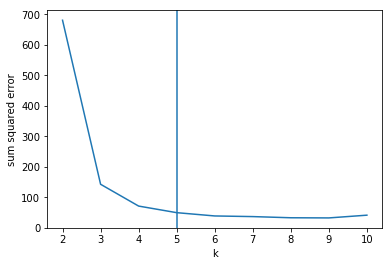

In [11]:
plot_k_sse(X, 2, 10)
plt.axvline(x = 5, ls = '-')

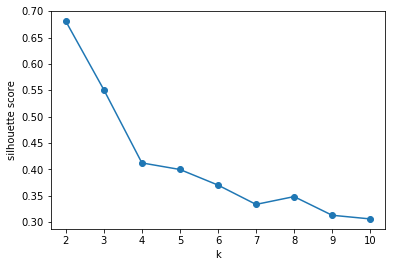

In [12]:
plot_k_silhouette(X, 2, 10)

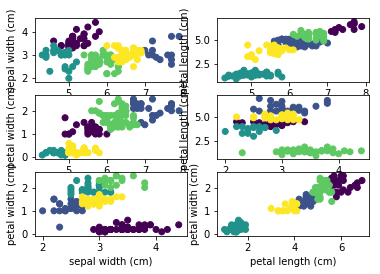

In [6]:
plt.figure(figsize=(12, 12))
plot_all_2d(X, np.array(iris.feature_names), k=5)
